**Time Series**

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values.

**Import Library**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

**Import Dataset**

Dataset source : https://www.kaggle.com/datasets/jainilcoder/netflix-stock-price-prediction



**About Dataset**


The Dataset contains data for 5 years ie. from 5th Feb 2018 to 5th Feb 2022

The art of forecasting stock prices has been a difficult task for many of the researchers and analysts. In fact, investors are highly interested in the research area of stock price prediction. For a good and successful investment, many investors are keen on knowing the future situation of the stock market. Good and effective prediction systems for the stock market help traders, investors, and analyst by providing supportive information like the future direction of the stock market.

In [4]:
# https://drive.google.com/file/d/1bqsYNkpllILZZNXFftNVFfKwLlo6OL9P/view?usp=sharing

!gdown 1bqsYNkpllILZZNXFftNVFfKwLlo6OL9P

Downloading...
From: https://drive.google.com/uc?id=1bqsYNkpllILZZNXFftNVFfKwLlo6OL9P
To: /content/NFLX.csv
100% 74.9k/74.9k [00:00<00:00, 125MB/s]


In [5]:
train_data = pd.read_csv('NFLX.csv')
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


- Open is the opening price
- High is the highest transaction price on that day
- Low is the lowest transaction price on that day
- Close is the Closing Price
- Adj Close is an accurate Closing price
- Volume is the closing price of shares that has been amended
  to include any distribution

Check missing values

train_data.info() digunakan untuk mengecek missing value. Pada Dataset Neflix ini tidak terdapat missing value karena semua panjang datanya sama. Selain itu, dapat mengetahui informasi dari tipe data disetiap kolom pada dataset ini.








train_data.info() is used to check the missing value. In this Neflix Dataset there is no missing value because all data lengths are the same. In addition, it can find out information from the data type in each column in this dataset.

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


Check statistic vales for every features

train_data.describe() digunakan untuk mengecek count, nilai median, mean, std, nilai min dan max serta persentase dari 25%, 50%, &dan 75% yang terdapat pada dataset ini.


train_data.describe() is used to check the count, median, mean, std, min and max values and the percentage of 25%, 50%, & 75% contained in this dataset.

In [7]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


Handle datetime data for time series

Pada codingan dibawah ini digunakan untuk digunakan untuk menambahkan tabel date pada table sebelumnya agar ketika dirun maka otomatis akan terbaca data date dan bentuk datenya berupa tahun, bulan dan hari.

The coding below is used to add a date table to the previous table so that when run, it will automatically read the date data and the date form in the form of years, months and days.


In [8]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

Codingan ini digunakan untuk mengetahui closing price yang terjadi selama 5 tahun dari tahun 2018 hingga tahun 2022. Dan pada plot dibawah ini menggambarkan bahwa closing price yang terjadi selama 5 tahun cenderung naik turun dari tahun ke tahun.


This coding is used to determine the closing price that occurred for 5 years from 2018 to 2022. And in the plot below illustrates that closing prices that occur for 5 years tend to go up and down from year to year.

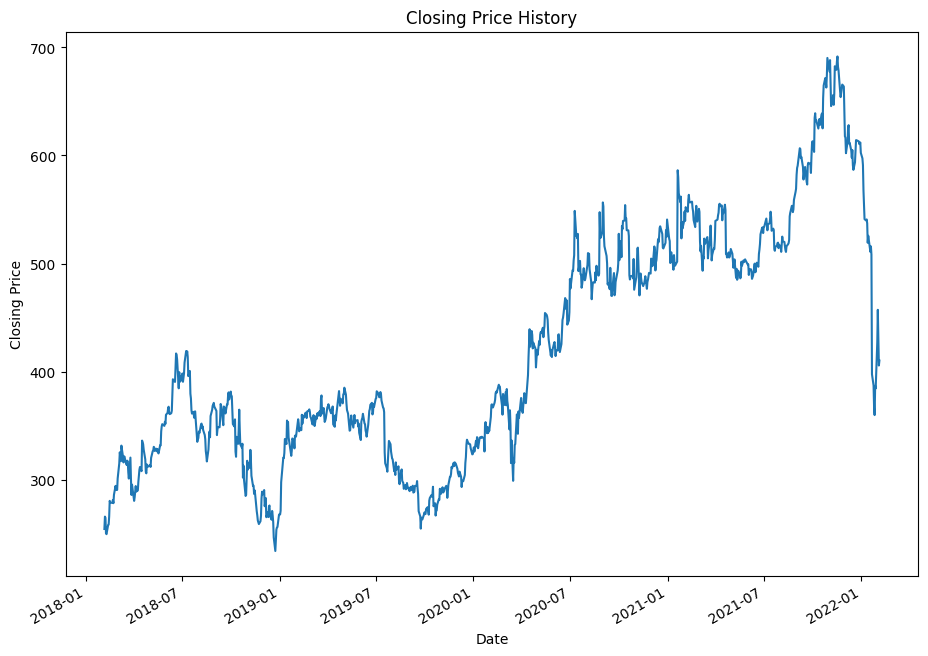

In [9]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

Pada codingan dibawah ini digunakan untuk mengecek trend untuk data Open, Close, Volume, High dan Low. Pada diagram plot dibawah ini dapat dilihat bahwa untuk data Open, Close, Volume, High dan Low mengalami trend yang naik turun.

The coding below is used to check trends for Open, Close, Volume, High and Low data. In the plot diagram below, it can be seen that the Open, Close, Volume, High and Low data experience an up and down trend.

<Figure size 1600x800 with 0 Axes>

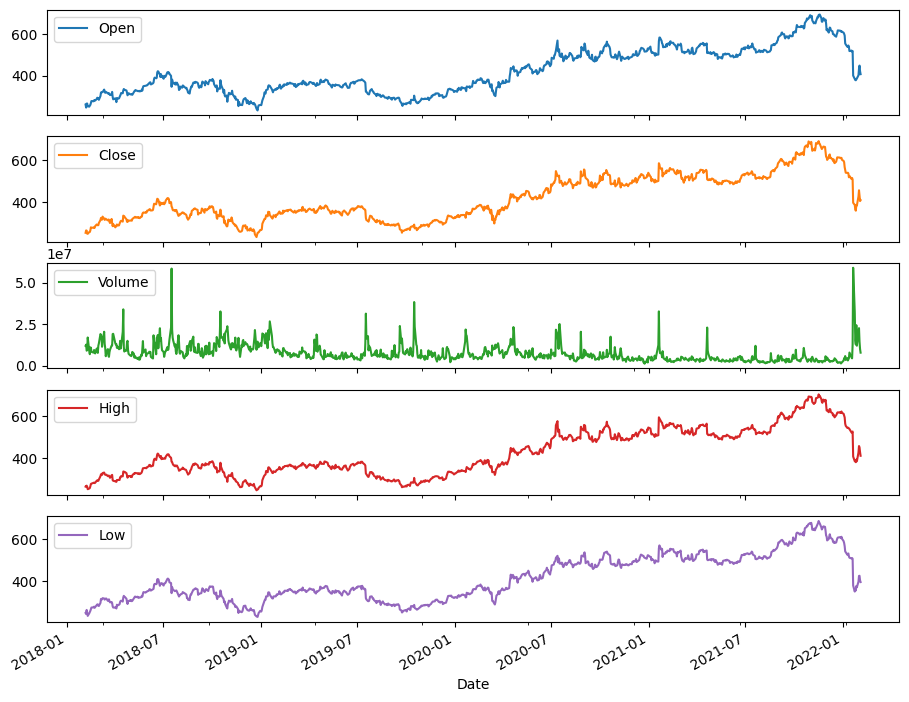

In [9]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

Pada codingan dibawah ini digunakan untuk membaca harga terendah dan harga tertinggi sekaligus membaca harga penutupan dan pembukaannya. Lalu, Membuatnya dalam bentuk persentasenya yang kemudian akan dimasukkan kedalam dataset nya.

The coding below is used to read the lowest price and the highest price as well as read the closing and opening prices. Then, make it in percentage form which will then be entered into the dataset.

In [10]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

In [11]:
df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]

Pada codingan dibawah ini untuk harga penutupan saham dijadikan sebagai label untuk melakukan forecasting.

In the coding below, the closing price of the stock is used as a label for forecasting.

In [12]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

51


<ipython-input-12-8a15e8de9d0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

Pada codingan dibawah ini digunakan untuk normalisasi data karena datanya memiki ukuran yang berbeda dan intervalnya cukup jauh yaitu berkisar ribuan, ratus ribuan dan hal ini  digunakan agar harga range nya tidak terlalu jauh ataupun lama.


The coding below is used for data normalization because the data has different sizes and the interval is quite far, which ranges from thousands, hundreds of thousands and this is used so that the price range is not too far or long.

In [23]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-23-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


Pada codingan dibawah ini digunakan untuk melakukan slicing dengan menentukan x Dan y dimana y diambil dari data label.

The coding below is used to do slicing by specifying x and y where y is taken from the label data.

In [20]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

In [21]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-21-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Codingan dibawah ini digunakan untuk melakukan splitting untuk train dan testnya dengan menggunakan 2 model yaitu LinearRegression dan RandomForest.


The coding below is used to do splitting for the train and test using 2 models, namely LinearRegression and RandomForest.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

In [27]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

Codingan dibawah ini digunakan untuk melakukan train dengan 86400 detik.

The coding below is used to train with 86400 seconds.

In [28]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-28-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-28-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-28-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

Codingan dibawah ini digunakan untuk prediksi atau peramalan untuk beberapa bulan kedepan. Dan untuk diagram plot garis berwarna orange dibawah ini merupakan hasil peramalan untuk dataset neflix selama beberapa bulan kedepan.

The coding below is used for predictions or forecasts for the next few months. And for the orange line plot chart below is the forecasting result for the neflix dataset for the next few months.

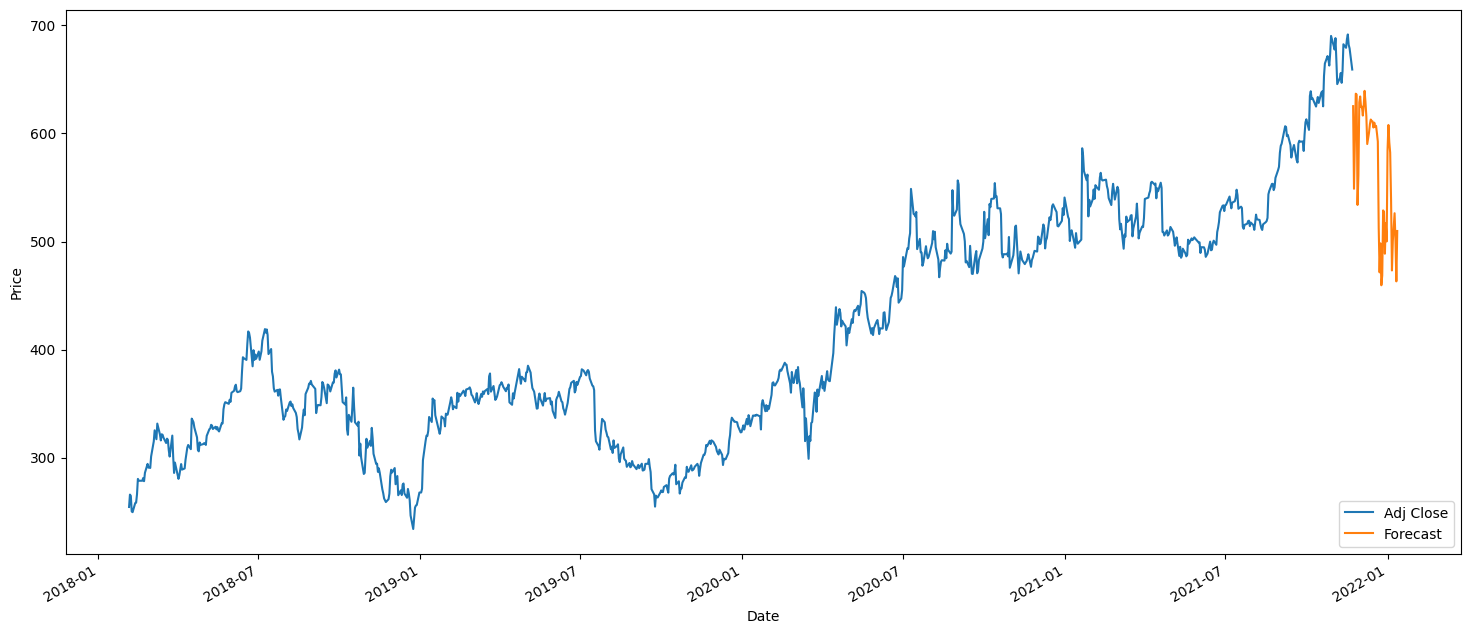

In [29]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()